In [ ]:
!pip -q install datasets evaluate
!pip -q install --upgrade accelerate
!pip install -q kaggle
!pip install datasets huggingface_hub -q
!pip install --upgrade transformers
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


Data Downloading




In [ ]:
import torch
import torchvision
import gradio as gr
from PIL import Image
import numpy as np
# import evaluate
from datasets import load_dataset
from huggingface_hub import notebook_login
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import DefaultDataCollator
from datasets import load_dataset
from huggingface_hub import notebook_login
from transformers import AutoImageProcessor
from torchvision.transforms import RandomResizedCrop,Resize,Compose,Normalize,ToTensor,RandomHorizontalFlip
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from transformers import AutoImageProcessor, AutoModelForImageClassification
import requests
import matplotlib.pyplot as plt


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.25G/1.25G [00:36<00:00, 29.0MB/s]
100% 1.25G/1.25G [00:36<00:00, 37.0MB/s]


In [ ]:
!unzip "/content/plant-disease-recognition-dataset.zip" -d "/content/dataset"

Archive:  /content/plant-disease-recognition-dataset.zip
  inflating: /content/dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: /content/dataset/Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: /conten

Dataset Loading




In [ ]:
# plant_dataset = load_dataset(
#      'imagefolder',
#      data_dir = '/content/dataset'
# )

Resolving data files:   0%|          | 0/1532 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# plant_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1532
    })
})

In [ ]:
# notebook_login()

In [ ]:
# repo_name = "plant-dataset"
# plant_dataset.push_to_hub(repo_name)

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ? shards/s]

Map:   0%|          | 0/511 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              :   5%|4         | 22.7MB /  466MB            

Map:   0%|          | 0/511 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              :   8%|7         | 35.7MB /  447MB            

Map:   0%|          | 0/510 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              :   8%|8         | 36.8MB /  440MB            

CommitInfo(commit_url='https://huggingface.co/datasets/AnkitJAAT311/plant-dataset/commit/3e5916bd366447c37ae7ca45379d7e7ace630cd3', commit_message='Upload dataset', commit_description='', oid='3e5916bd366447c37ae7ca45379d7e7ace630cd3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/AnkitJAAT311/plant-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='AnkitJAAT311/plant-dataset'), pr_revision=None, pr_num=None)

In [ ]:
full_dataset = load_dataset("AnkitJAAT311/plant-dataset",split="train")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/418 [00:00<?, ?B/s]

data/train-00000-of-00003.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

data/train-00001-of-00003.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

data/train-00002-of-00003.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1532 [00:00<?, ? examples/s]

In [ ]:
full_dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1532
})

Data Splitting


In [ ]:
# Split the dataset into training and the rest (validation + test)
train_rest = full_dataset.train_test_split(test_size = 0.2)

# split the rest (validation + test) into validation and test sets
test_valid = train_rest['test'].train_test_split(test_size=0.5)

# Assign the splits to new variables
train_dataset = train_rest['train']
validation_dataset = test_valid['train']
test_dataset = test_valid['test']

print("Training dataset size:",len(train_dataset))
print("Validation dataset size:",len(validation_dataset))
print("Test dataset size:", len(test_dataset))

Training dataset size: 1225
Validation dataset size: 153
Test dataset size: 154


Data Visualization



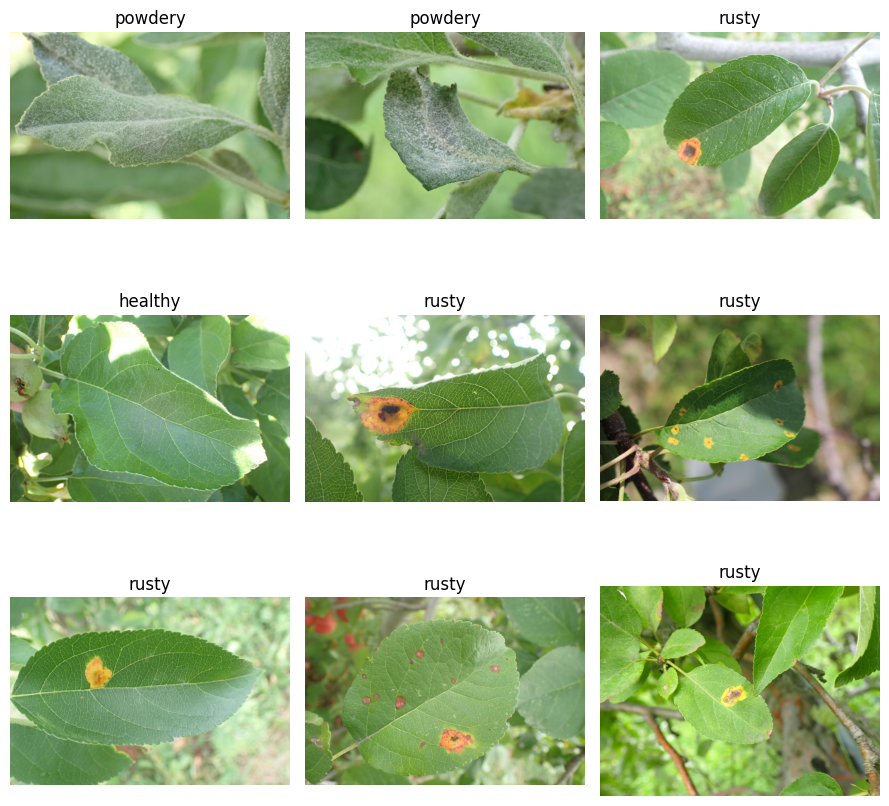

In [ ]:
label_names = {
    0: "healthy",
    1: "powdery",
    2: "rusty",
}
num_rows = 3
num_cols = 3

plt.figure(figsize = (num_cols * 3,num_rows * 3))
indices = np.random.choice(range(len(train_dataset)),size = 9,replace = False)
for i,idx in enumerate(indices,1):
  idx = int(idx)
  image = train_dataset[idx]['image']
  label = train_dataset[idx]['label']

  plt.subplot(num_rows,num_cols,i)
  plt.imshow(image)
  plt.title(label_names[label])
  plt.axis('off')

plt.tight_layout()
plt.show()

Data Preprocessing


In [ ]:
checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
normalize = Normalize(mean = image_processor.image_mean,std = image_processor.image_std)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
train_transforms = Compose([
    RandomResizedCrop((224,224)),
    RandomHorizontalFlip(p=0.5),
    ToTensor(),
    normalize

])

val_transforms = Compose([
    Resize((224,224)),
    ToTensor(),
    normalize

])

def apply_transforms(examples):
  examples["pixel_values"] = [train_transforms(img.convert("RGB")) for img in examples["image"]]
  del examples["image"]
  return examples

def apply_val_transforms(examples):
  examples["pixel_values"] = [val_transforms(img.convert("RGB")) for img in examples["image"]]
  del examples["image"]
  return examples

In [ ]:
train_data = train_dataset.with_transform(apply_transforms)
val_data = validation_dataset.with_transform(apply_val_transforms)
test_data = test_dataset.with_transform(apply_val_transforms)
data_collator = DefaultDataCollator()

Modeling and Training



In [ ]:
id2label = label_names
label2id = {v: k for k,v in id2label.items()}
print(id2label,label2id)

{0: 'healthy', 1: 'powdery', 2: 'rusty'} {'healthy': 0, 'powdery': 1, 'rusty': 2}


In [ ]:
model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels = 3,
    id2label = id2label,
    label2id = label2id,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")
def compute_metrics(evaluation_data):
  predictions, labels = evaluation_data
  predictions = np.argmax(predictions,axis = 1)

  return accuracy.compute(predictions = predictions,
                          references = labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="./plant_outputs",
    remove_unused_columns = False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate = 5e-5,
    per_device_train_batch_size = 2,
    gradient_accumulation_steps = 4,
    per_device_eval_batch_size = 2,
    num_train_epochs = 3,
    warmup_ratio = 0.1,
    logging_steps = 10,
    load_best_model_at_end = True,
    push_to_hub = True,
)

In [ ]:
# notebook_login()

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset = train_data,
    eval_dataset = val_data,
    tokenizer = image_processor,
    compute_metrics = compute_metrics,
)

/tmp/ipython-input-1396050456.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.107200,0.029804,0.993464
2,0.136000,0.069824,0.973856
3,0.034000,0.013434,1.000000


TrainOutput(global_step=462, training_loss=0.07388977103290104, metrics={'train_runtime': 1044.5456, 'train_samples_per_second': 3.518, 'train_steps_per_second': 0.442, 'total_flos': 2.847856142541312e+17, 'train_loss': 0.07388977103290104, 'epoch': 3.0})

In [ ]:
outputs = trainer.predict(val_data)
print(outputs.metrics)

{'test_loss': 0.013434479013085365, 'test_accuracy': 1.0, 'test_runtime': 43.3526, 'test_samples_per_second': 3.529, 'test_steps_per_second': 1.776}


In [ ]:
model.push_to_hub("vit-plant")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...lvatjkq/model.safetensors:  10%|9         | 33.5MB /  343MB            

CommitInfo(commit_url='https://huggingface.co/AnkitJAAT311/vit-plant/commit/47c25e5f3c7f023146fcf7b3ecd309e1c15a4176', commit_message='Upload ViTForImageClassification', commit_description='', oid='47c25e5f3c7f023146fcf7b3ecd309e1c15a4176', pr_url=None, repo_url=RepoUrl('https://huggingface.co/AnkitJAAT311/vit-plant', endpoint='https://huggingface.co', repo_type='model', repo_id='AnkitJAAT311/vit-plant'), pr_revision=None, pr_num=None)

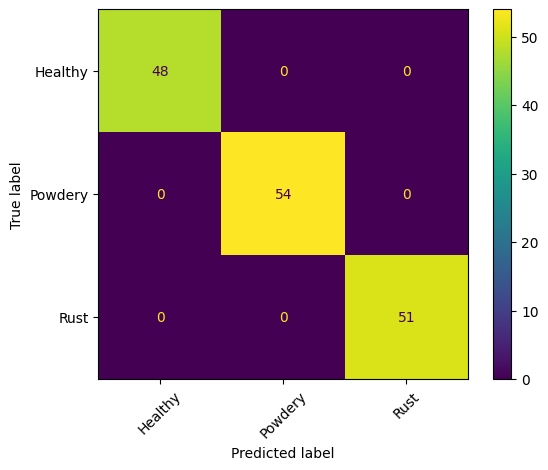

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = test_data.features["label"].names

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

In [ ]:
from transformers import pipeline,AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
pipe = pipeline("image-classification", model="AnkitJAAT311/vit-plant",image_processor=processor)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


In [ ]:
predictions = pipe("/content/dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg")

In [ ]:
print(predictions)

[{'label': 'healthy', 'score': 0.9866399168968201}, {'label': 'rusty', 'score': 0.00675641093403101}, {'label': 'powdery', 'score': 0.00660370197147131}]


In [ ]:
def predict_disease(image):

  if image is None:
    return "Please upload an image"

  try:
    prediction = pipe(image)
    result = prediction[0]['label']
    return f"Prediction: {result}"
  except Exception as e:
    return f"An error occured during prediction: {e}"

In [ ]:
iface = gr.Interface(
    fn = predict_disease,

    inputs=gr.Image(
        type = "pil",
        label = "Upload Plant Image"
    ),

    outputs = gr.Textbox(
        label = "Classification Result"
    ),
    title = "Plant Disease Classifier (Healthy, Powdery, or Rusty)",
    description="Upload an image of a plant leaf. The system will classify its condition.",
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://42ca4b31122b3ada93.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
